In [58]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading Data
df =load_dataset('lukebarousse/data_jobs', split='train').to_pandas()


#data cleanup
df['job_posted_date'] =pd.to_datetime(df['job_posted_date'])

import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [63]:
#Filter for Data Analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x:pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')
df_DA_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind = 'line', 
    linewidth = 4,
    linestyle = ':', #options:'-', '--','-.',':' 
    colormap = 'tab20c', 
    marker = 'o',
    markersize = 7,
    figsize = (10,5)

)
plt.title('Popular Skills for Data Analyst Jobs by Month')
plt.xlabel(' ')
plt.ylabel('Count')
plt.show())

In [64]:
df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [66]:

skill_stats = df_DA_exploded.groupby('job_skills').agg(
    skill_count =('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
#limit to top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending = False).head(skill_count)




In [ ]:
#run into an issue so was troubleshooting
skill_stats = skill_stats.dropna(subset=['median_salary'])

skill_stats['skill_count'].isna().sum()

print(skill_stats['median_salary'].eq(0).sum())
print(skill_stats.dtypes)
print(skill_stats[['median_salary', 'skill_count']].describe())



0
skill_count        int64
median_salary    float64
dtype: object
       median_salary   skill_count
count     177.000000    177.000000
mean    99145.593452   3586.333333
std     31029.144192  10912.563795
min     50325.035156      1.000000
25%     85000.000000    128.000000
50%     96600.000000    572.000000
75%    107000.000000   2137.000000
max    400000.000000  92428.000000


In [ ]:
from adjustText import adjust_text


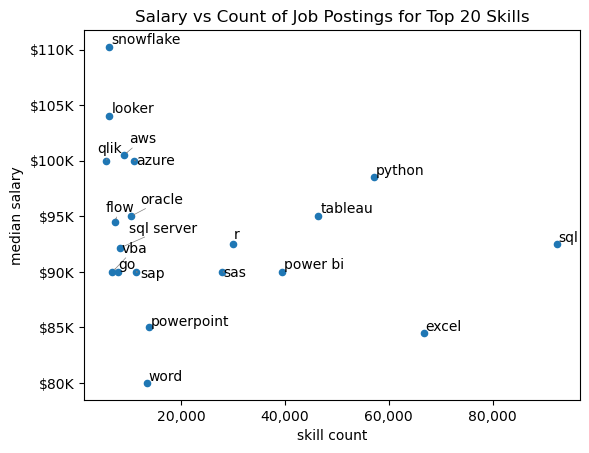

In [78]:
#fig, ax = plt.subplots()

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
texts = []
for i ,txt in enumerate(skill_stats.index):
 texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))


plt.title(f'Salary vs Count of Job Postings for Top {skill_count} Skills')
plt.ylabel('median salary')
plt.xlabel('skill count')
plt.show()